In [1]:
import math
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt

In [2]:
def distanceCheck(x1, x2, y1, y2, r1, r2):
    dist = math.sqrt((x1-x2)**2 + (y1-y2)**2)
    if dist > (r1+r2):
        return True
    if dist < (r1+r2):
        return False

In [3]:
def randRadius():
    r = round(np.random.uniform(.025, .1), 3)
    return r

In [4]:
def circleGen(r):
    xPos = round(np.random.uniform(r, 1.0-r),3)
    return xPos

In [5]:
def areaCheck(r):
    totalArea = 0
    area = 0
    for i in range(len(r)):
        area = math.pi*r[i]*r[i]
        totalArea += area
    if totalArea >= .55:
        return True
    else:
        return False

Total time (s): 0.008047103881835938
Total Circles placed: 44


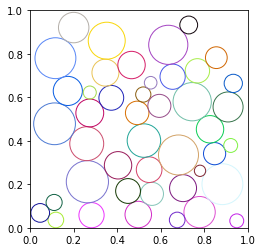

In [6]:
startTime = time.time()

x_value = []
y_value = []
r_value = []

r = randRadius()

##Generates first circle

x_value.append(circleGen(r))
y_value.append(r)
r_value.append(r)
#area = areaCheck(r_value)
totalArea = .55
iteration = 0
while totalArea >= 0:
    r = randRadius()
    x = circleGen(r)
    y = r
    y_check = 0
    while y_check != y:
        y_check = y
        for i in range(len(x_value)):
            distance = distanceCheck(x, x_value[i], y, y_value[i], r, r_value[i])
            if distance != True:
                y = y_value[i] + math.sqrt((r+r_value[i])**2 - (x-x_value[i])**2)
                
    if y <= 1.0 - r:
        y_value.append(y)
        x_value.append(x)
        r_value.append(r)
        totalArea -= math.pi*r*r
        #print("Total Fill (%): " + str(round((.55 - totalArea)*100, 1)))
        #print("Fill Remaining (%): " + str(round((totalArea*100), 1)))
        iteration += 1
        
    else:
        continue
    
print("Total time (s): " + str(time.time()-startTime))        
print("Total Circles placed: " + str(iteration))   
fig, ax = plt.subplots()
plt.xlim(0, 1)
plt.ylim(0, 1)
ax.set_aspect(1)
for i in range(len(x_value)-1):
    circle1 = plt.Circle((x_value[i], y_value[i]), r_value[i], color=(np.random.uniform(0,1), np.random.uniform(0,1), np.random.uniform(0,1)), clip_on=False, fill=False)
    ax.add_artist(circle1)
plt.show()